# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

In [2]:
start_t = time.time()

time.sleep(5)

time_elapsed = time.time() - start_t
print(time_elapsed)

5.001772165298462


### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [3]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [4]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [5]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
0.0
0.0
0.0
0.0
0.0
0.0
0.003
0.0
-0.001
-0.001
-0.001
0.0
0.0
-0.002
-0.002
-0.002
0.999
0.999
0.999
1.994
1.997
1.998
1.998
1.998
2.994
2.997
2.998
2.998
2.997
3.993
3.998
3.997
3.996
3.996
4.991
4.994
4.995
4.994
4.994
5.991
5.995
5.995
5.993
5.993
6.775
6.775
6.774
6.775
7.553
7.555
7.556
7.554
7.555
8.551
8.556
8.555
8.554
8.554
9.55
9.553
9.554
9.553
9.552
10.548
10.552
10.552
10.551
10.551
10.551
11.552
11.552
11.55
11.55
12.545
12.547
12.549
12.549
12.551
13.544
13.547
13.547
13.546
13.547
14.077
14.081
14.081
14.081
14.081
14.613
14.613
14.612
14.611
15.612
15.612
15.612
15.612
16.607
16.611
16.611
16.61
16.61
17.605
17.608
17.609
17.607
17.608
18.578
18.582
18.582
18.581
18.582
19.552
19.552
19.551
19.551
20.521
20.523
20.524
20.523
20.523
21.404
21.406
21.407
21.406
21.406
22.294
22.294
22.293
22.293
23.29
23.29
23.289
23.289
24.287
24.287
24.286
24.285
25.284
25.284
25.283
25.282
26.282
26.282
26.279
26.279
27.278
2

57.478
57.478
57.476
57.476
57.476
57.476
57.476
57.476
57.476
57.476
57.476
57.474
57.474
57.474
57.474
57.474
57.474
57.474
57.474
57.474
57.474
57.474
57.474
57.473
57.473
57.472
57.472
57.473
57.473
57.473
57.473
57.473
57.473
57.473
57.473
57.474
57.474
57.473
57.707
57.707
57.707
57.707
57.707
57.707
57.707
57.729
57.729
57.732
57.734
57.729
57.716
57.745
57.745
57.744
57.744
57.744
57.744
57.744
57.743
57.743
57.743
57.743
57.743
57.744
57.744
57.744
57.744
57.744
57.744
57.744
57.742
57.742
57.742
57.743
57.743
57.743
57.742
57.742
57.742
57.742
57.742
57.742
57.742
57.743
57.743
57.743
57.742
57.742
57.742
57.742
57.741
57.739
57.998
57.999
57.999
57.999
57.999
57.999
57.998
57.998
57.998
58.02
58.02
58.031
58.02
58.022
58.022
58.029
58.025
58.024
58.02
58.02
58.019
58.02
58.022
58.022
58.022
58.021
58.023
58.361
58.361
58.367
58.367
58.366
58.367
58.367
58.366
58.365
58.365
58.366
58.862
58.863
58.863
58.866
58.859
58.864
58.863
58.863
58.863
59.088
59.087
59.102
59.102
59.10

KeyboardInterrupt: 

In [6]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [7]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1381,2762,59.798
1382,2764,59.798
1383,2766,59.799
1384,2768,59.799


<IPython.core.display.Javascript object>


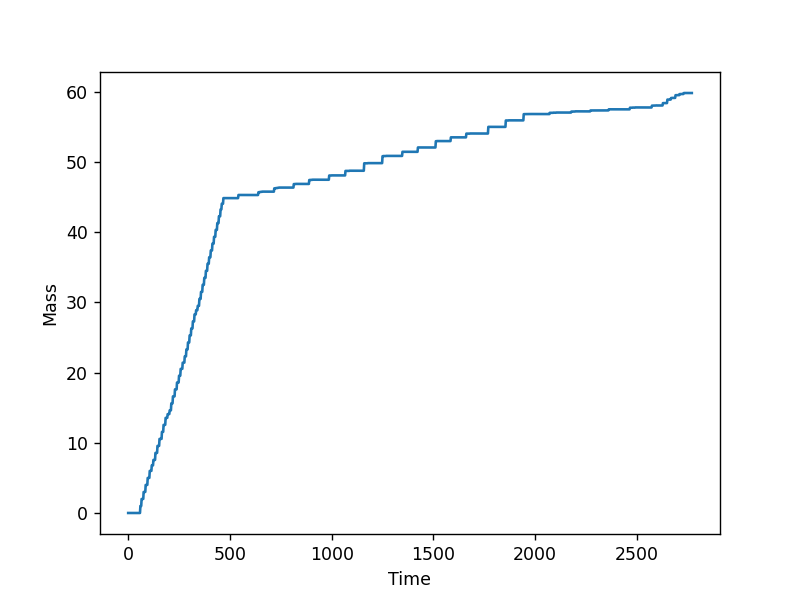

In [8]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [9]:
mass_df.to_csv('mass_data/MassProfile_260523_S529-534.csv')